In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import tensorflow as tf

In [3]:
df = pd.read_csv("../classificacao/Corona_NLP_train.csv",encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [7]:
df = df.drop(columns=[ "UserName","ScreenName","Location","TweetAt"], axis=1)

In [8]:
def categorize_sentiment(score):
    if score == 'Negative':
        return "Negative"
    elif score == 'Extremely Negative':
        return "Negative"
    elif score == 'Positive':
        return "Positive"
    elif score == 'Extremely Positive':
        return "Positive"
    else:
        return "Neutral"
    
    
df['Sentiment'] = df['Sentiment'].apply(categorize_sentiment)

In [9]:
# df['label'] = df.label.map({'Detractor':0, 'Promoter':1, 'Passive':2})

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Sentiment']

one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),colunas_categoricas),remainder='passthrough')


df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df

,onehotencoder__Sentiment_Negative,onehotencoder__Sentiment_Neutral,onehotencoder__Sentiment_Positive,remainder__OriginalTweet
0,0.0,1.0,0.0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,0.0,0.0,1.0,advice Talk to your neighbours family to excha...
2,0.0,0.0,1.0,Coronavirus Australia: Woolworths to give elde...
3,0.0,0.0,1.0,My food stock is not the only one which is emp...
4,1.0,0.0,0.0,"Me, ready to go at supermarket during the #COV..."
...,...,...,...,...
41152,0.0,1.0,0.0,Airline pilots offering to stock supermarket s...
41153,1.0,0.0,0.0,Response to complaint not provided citing COVI...
41154,0.0,0.0,1.0,You know itÂs getting tough when @KameronWild...
41155,0.0,1.0,0.0,Is it wrong that the smell of hand sanitizer i...


In [10]:
df.onehotencoder__Sentiment_Negative = pd.to_numeric(df.onehotencoder__Sentiment_Negative)
    

df.onehotencoder__Sentiment_Neutral = pd.to_numeric(df.onehotencoder__Sentiment_Neutral)
    

df.onehotencoder__Sentiment_Positive = pd.to_numeric(df.onehotencoder__Sentiment_Positive)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   onehotencoder__Sentiment_Negative  41157 non-null  float64
 1   onehotencoder__Sentiment_Neutral   41157 non-null  float64
 2   onehotencoder__Sentiment_Positive  41157 non-null  float64
 3   remainder__OriginalTweet           41157 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [12]:
nltk.download('stopwords')
stemmer = PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pedrofff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pedrofff\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
!pwd

'pwd' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [13]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("english")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

textPreprocessor("We need to STOCK UP in anticipation of a possible response or directive related to COVID-19 so we've created a SPECIFIC Amazon Wishlist.\r\r\n.\r\r\nFOOD Items include: black beans, shredded cheese, frozen meats, canned tuna,\x85 https://t.co/NZAoPtKliy")

['need',
 'stock',
 'anticip',
 'possibl',
 'respons',
 'direct',
 'relat',
 'covid19',
 'weve',
 'creat',
 'specif',
 'amazon',
 'wishlist\r\r\n\r\r\nfood',
 'item',
 'includ',
 'black',
 'bean',
 'shred',
 'chees',
 'frozen',
 'meat',
 'can',
 'tuna\x85',
 'httpstconzaoptkliy']

In [14]:
#ML Preprocessing
df_frac = df.sample(frac=0.20, random_state=42)
# df_frac = df.sample(frac=0.20, random_state=42) <-
label = df_frac.iloc[:,0:3].values
txt = df_frac.iloc[:,3].values
txt

array([' Without the there would not be any problem whatsoever People are getting worried about the supply chain   Prices for key food staples are starting to soar in some parts of the world via',
       'Rice &amp; wheat prices surge amid fears Covid-19 lockdown may threaten global food security\r\r\nIncreased panic buying of food due to coronavirus lockdowns has led to price spikes for  worldÂ\x92s two staple grains, rice&amp; wheat. Importers rushed to stockpile goods\r\r\n https://t.co/0qOv3jAp9m',
       "When the government says to start social distancing, but you work retail so you can't just not talk to customers in the store lol fml I'm 100% going to catch covid-19",
       ...,
       'I can pretty much guarantee it s going to be healthcare workers and grocery store folks non profits delivery people and the like who are going to save your ass during the pandemic and not the Kardashians',
       'No grooming. No eating out. No online shopping. IÂ\x92m back in my early 20Â\x92s

In [15]:
#Create Bag Of Words 

#Initialize Count Vectorizer with our custom preprocessing function

wordVector = CountVectorizer(analyzer=textPreprocessor)

#Build Vocab
finalWordVocab = wordVector.fit(txt)

In [16]:
finalWordVocab.vocabulary_

{'': 0,
 'without': 24866,
 'would': 25006,
 'problem': 19324,
 'whatsoev': 24700,
 'peopl': 18589,
 'get': 8828,
 'worri': 24987,
 'suppli': 22547,
 'chain': 4452,
 'price': 19211,
 'key': 15075,
 'food': 8287,
 'stapl': 22034,
 'start': 22044,
 'soar': 21666,
 'part': 18425,
 'world': 24965,
 'via': 24241,
 'rice': 20283,
 'amp': 2478,
 'wheat': 24704,
 'surg': 22594,
 'amid': 2462,
 'fear': 7982,
 'covid19': 5647,
 'lockdown': 15724,
 'may': 16278,
 'threaten': 23159,
 'global': 8918,
 'security\r\r\nincreas': 20975,
 'panic': 18331,
 'buy': 4034,
 'due': 7091,
 'coronaviru': 5346,
 'led': 15457,
 'spike': 21879,
 'worldâ\x92': 24983,
 'two': 23709,
 'grain': 9108,
 'riceamp': 20285,
 'import': 14206,
 'rush': 20533,
 'stockpil': 22214,
 'goods\r\r\n': 9020,
 'httpstco0qov3jap9m': 9997,
 'govern': 9069,
 'say': 20797,
 'social': 21674,
 'distanc': 6752,
 'work': 24922,
 'retail': 20192,
 'cant': 4199,
 'talk': 22738,
 'custom': 6075,
 'store': 22265,
 'lol': 15777,
 'fml': 8260,
 'i

In [17]:
len(finalWordVocab.vocabulary_)

25571

In [18]:
#Create Bag Of Words

bagOfWords = finalWordVocab.transform(txt)

bagOfWords

<8231x25571 sparse matrix of type '<class 'numpy.int64'>'
	with 150042 stored elements in Compressed Sparse Row format>

In [19]:
#Apply TFIDF on Bag Of Words

#Calc All Values (TF and IDF)

tfIdfObject = TfidfTransformer().fit(bagOfWords)

#Transform data (Calc Weights)
finalFeature = tfIdfObject.transform(bagOfWords)

finalFeature

<8231x25571 sparse matrix of type '<class 'numpy.float64'>'
	with 150042 stored elements in Compressed Sparse Row format>

In [20]:
X_traint, X_testt, y_traint, y_testt = train_test_split(finalFeature, label, test_size=0.2, random_state=42)

X_traint, X_validt, y_traint, y_validt = train_test_split(X_traint, y_traint, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [21]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
finalFeature, label = oversample.fit_resample(finalFeature, label)

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(finalFeature, label, test_size=0.3, random_state=53)
X_train, X_test, y_train, y_test = train_test_split(finalFeature, label, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [23]:
y_valid

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [24]:
y_train

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [25]:
X_train = X_train.toarray()
X_valid = X_valid.toarray()

In [26]:
type(X_valid)

numpy.ndarray

## Estudo do PCA

In [27]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


pca = PCA(n_components=2)
PCA = pca.fit(finalFeature.toarray())
X_pca = pca.transform(finalFeature.toarray())

# clf = TruncatedSVD()
# pca = clf.fit_transform(X_train)

# pca = pd.DataFrame(pca)

# X_pca.rename(columns={0: 'x', 1: 'y'}, inplace = True)



X_pca


array([[ 0.23407008, -0.04321733],
       [-0.00104928, -0.08336596],
       [-0.0524418 ,  0.11950755],
       ...,
       [-0.04298727, -0.05382124],
       [-0.04721634,  0.00204536],
       [-0.04944566,  0.07360939]])

In [28]:
from sklearn.cluster import KMeans

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(5)

c:\Users\Pedrofff\Desktop\Dados_Pratica_04_Portarias\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,x,y,label
0,0.234070,-0.043217,2
1,-0.001049,-0.083366,1
2,-0.052442,0.119508,0
3,0.097682,-0.039646,1
4,-0.053662,-0.067988,1


In [29]:
lbl = dfcl['label']
lbl

0        2
1        1
2        0
3        1
4        1
        ..
10846    0
10847    0
10848    1
10849    1
10850    0
Name: label, Length: 10851, dtype: int32

C:\Users\Pedrofff\AppData\Local\Temp\ipykernel_27308\531807487.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='Set2')


Text(0.5, 1.0, 'scatter plot')

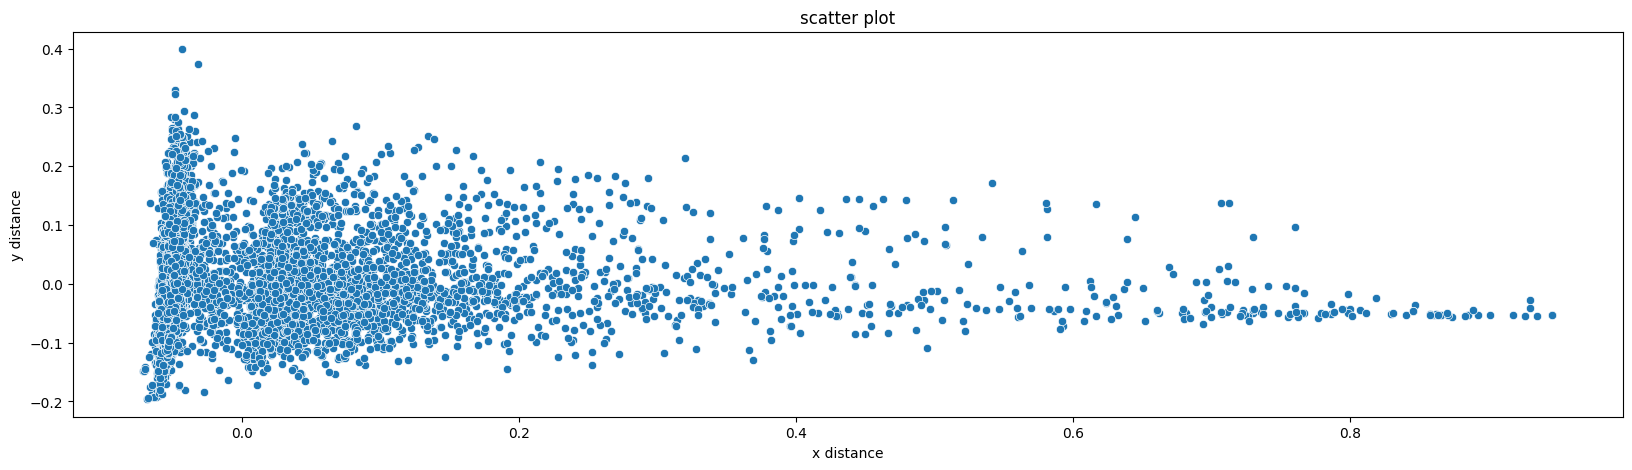

In [30]:
plt.figure(figsize=(20,5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='Set2')

plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')

In [31]:
# plt.figure(figsize=(20,5))

# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[label], palette='Set2', legend="full", )


# plt.xlabel('x distance')
# plt.ylabel('y distance')
# plt.title('Gráfico com rotulação')

In [62]:
from keras.initializers import glorot_uniform

def teste_model(flag): 

    n_neuronios_ocultos = 10
    iniciador_pesos = glorot_uniform(seed=42)
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential()
    
    if flag == 1:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dense(3, activation='selu'))
    elif flag == 2:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
    elif flag == 3:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='softplus'))
    elif flag == 4:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 5:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='relu'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(
        optimizer=optimizer,
        # Loss function to minimize
        loss="categorical_crossentropy",
        # loss=tf.keras.losses.CategoricalHinge(),
        # List of metrics to monitor
        metrics=["accuracy"]
    )
        
    model.build()
    model.summary()
    return model

In [63]:
model = teste_model(1) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 10)                255720    
                                                                 
 dense_100 (Dense)           (None, 10)                110       
                                                                 
 dense_101 (Dense)           (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 7ms/step - loss: 5.3811 - accuracy: 0.3376 - val_loss: 5.4816 - val_accuracy: 0.3221
Epoch 2/30
227/227 [==============================] - 1s 5ms/step - loss: 5.5101 - accuracy: 0.3362 - val_loss: 5.5262 - val_accuracy: 

In [64]:
model = teste_model(2) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                255720    
                                                                 
 dense_103 (Dense)           (None, 10)                110       
                                                                 
 dense_104 (Dense)           (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 1s 5ms/step - loss: 1.0968 - accuracy: 0.3529 - val_loss: 1.0951 - val_accuracy: 0.3691
Epoch 2/30
227/227 [==============================] - 1s 4ms/step - loss: 1.0903 - accuracy: 0.4296 - val_loss: 1.0909 - val_accuracy: 

In [65]:
model = teste_model(3) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 10)                255720    
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 6ms/step - loss: 1.3749 - accuracy: 0.3477 - val_loss: 1.3616 - val_accuracy: 0.3724
Epoch 2/30
227/227 [==============================] - 1s 6ms/step - loss: 1.3488 - accuracy: 0.3862 - val_loss: 1.3370 - val_accuracy: 

In [66]:
model = teste_model(4) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 10)                255720    
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
 dense_110 (Dense)           (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 6ms/step - loss: 1.3946 - accuracy: 0.3623 - val_loss: 1.3789 - val_accuracy: 0.3613
Epoch 2/30
227/227 [==============================] - 1s 5ms/step - loss: 1.3594 - accuracy: 0.4310 - val_loss: 1.3539 - val_accuracy: 

In [67]:
model = teste_model(5) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 10)                255720    
                                                                 
 dense_112 (Dense)           (None, 10)                110       
                                                                 
 dense_113 (Dense)           (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.3340 - val_loss: nan - val_accuracy: 0.3396
Epoch 2/30
227/227 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3336 - val_loss: nan - val_accuracy: 0.3396
Epoch

In [32]:
from keras.initializers import glorot_uniform

def create_model(flag): 

    n_neuronios_ocultos = 10
    iniciador_pesos = glorot_uniform(seed=42)
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential()

    if flag == 1:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 2:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 3:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 4:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 5:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu"))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 6:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.1), kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2(0.1), kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.1), kernel_initializer=iniciador_pesos))
        
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(
        optimizer=optimizer,
        # Loss function to minimize
        loss="categorical_crossentropy",
        # loss=tf.keras.losses.CategoricalHinge(),
        # List of metrics to monitor
        metrics=["accuracy"]
    )
        
    model.build()
    model.summary()
    return model

In [33]:
from keras.callbacks import LearningRateScheduler
import keras

def power_scheduler(epoch, initial_lr, max_epochs, power):
    return initial_lr * ((1 - epoch / max_epochs) ** power)

initial_lr = 0.01
max_epochs = 100
power = 2

power_schedule = LearningRateScheduler(lambda epoch: power_scheduler(epoch, initial_lr, max_epochs, power))



In [34]:
from keras.callbacks import LearningRateScheduler
import numpy as np

def exponential_scheduler(epoch, initial_lr, k):
    return initial_lr * np.exp(-k * epoch)

def power_scheduler(epoch, initial_lr, max_epochs, power):
    return initial_lr * ((1 - epoch / max_epochs) ** power)

initial_lr = 0.01
k = 0.1
power = 2

exp_schedule = LearningRateScheduler(lambda epoch: exponential_scheduler(epoch, initial_lr, k))

power_schedule = LearningRateScheduler(lambda epoch: power_scheduler(epoch, initial_lr, max_epochs, power))


In [35]:
import matplotlib.pyplot as plt 
import pandas as pd

def infos(model, history):
    _, accuracy = model.evaluate(X_valid, y_valid)
    
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_valid)
    
    macro = tf.keras.metrics.F1Score(average="macro", name='f1_score', dtype=None)
    
    micro = tf.keras.metrics.F1Score(average="micro", name='f1_score', dtype=None)
    
        
    macro.update_state(y_valid,y_pred)
    micro.update_state(y_valid,y_pred)
    print('Accuracy: %.2f' % (accuracy*100))

    print("macro = " + str((macro.result()).numpy()) + "\nmicro = " + str((micro.result()).numpy()))
        
    y_pred=np.argmax(y_pred, axis=1)
    y_valid1=np.argmax(y_valid, axis=1)
    cm = confusion_matrix(y_valid1, y_pred)
     
    sum = cm.sum()
    
    df_cm = pd.DataFrame(cm, index = [0, 1, 2], columns = [0, 1, 2])
    
    res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=1000.0,  cmap=plt.cm.Blues, fmt='g')
    plt.yticks([0.5,1.5,2.5], [0, 1, 2],va='center')
    plt.title('Matriz de Confusão')
    plt.show()
    
    pd.DataFrame(history.history).plot(
        figsize=(8, 5), grid=True, xlabel="Epoch", style=["r-", "r-.", "b-", "b-*"], ylim=(0, 1.5)
    )
    plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## puro

In [36]:
model = create_model(1) 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                255720    
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
204/204 [==============================] - 2s 5ms/step - loss: 1.0981 - accuracy: 0.3376 - val_loss: 1.0970 - val_accuracy: 0.3369
Epoch 2/30
204/204 [==============================] - 1s 3ms/step - loss: 1.0931 - accuracy: 0.3906 - val_loss: 1.0911 - val_accuracy: 0.4

68/68 [==============================] - 0s 1ms/step
Accuracy: 76.82
macro = 0.7670741
micro = 0.7682028


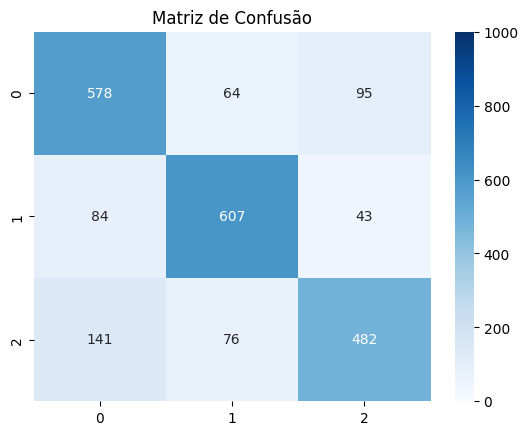

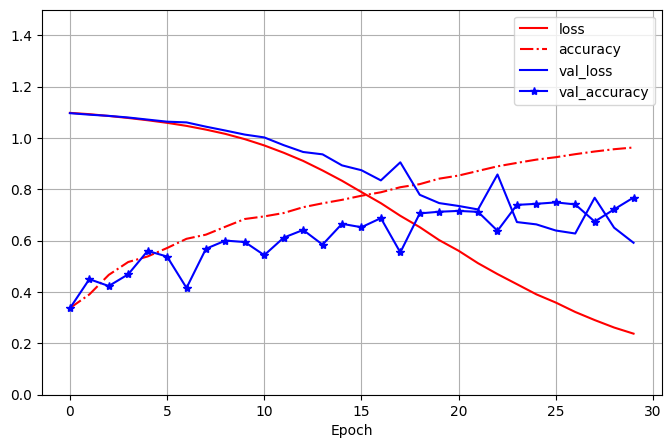

In [37]:
infos(model, history)

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(1) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                255720    
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 1s 5ms/step - loss: 1.0973 - accuracy: 0.3613 - val_loss: 1.0955 - val_accuracy: 0.3235
Epoch 2/30
227/227 [==============================] - 1s 4ms/step - loss: 1.0890 - accuracy: 0.4321 - val_loss: 1.0824 - val_accuracy: 0

## glorot

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
model = create_model(2)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                255720    
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 6ms/step - loss: 1.0949 - accuracy: 0.3619 - val_loss: 1.0926 - val_accuracy: 0.3479
Epoch 2/30
227/227 [==============================] - 1s 5ms/step - loss: 1.0789 - accuracy: 0.4534 - val_loss: 1.0872 - val_accuracy: 0

68/68 [==============================] - 0s 2ms/step
Accuracy: 88.57
macro = 0.88581014
micro = 0.8857143


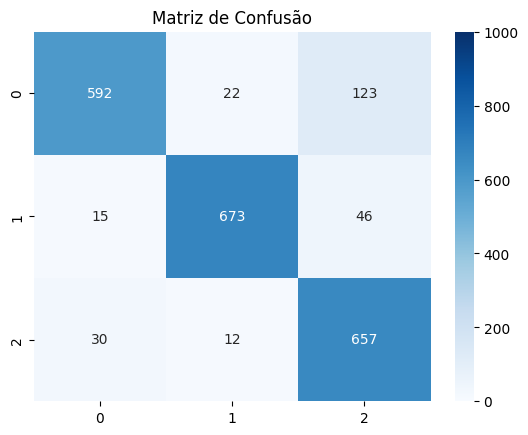

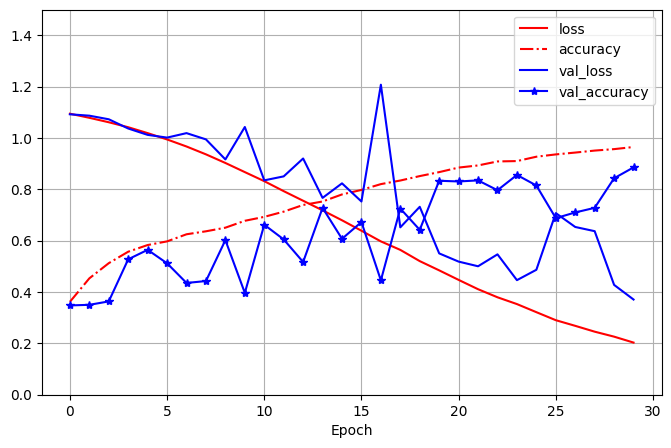

In [40]:
infos(model, history)

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(2) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                255720    
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 1s 4ms/step - loss: 1.0967 - accuracy: 0.3535 - val_loss: 1.1001 - val_accuracy: 0.3221
Epoch 2/30
227/227 [==============================] - 1s 3ms/step - loss: 1.0865 - accuracy: 0.4255 - val_loss: 1.0791 - val_accuracy: 0

## l2

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
model = create_model(3)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                255720    
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 2s 5ms/step - loss: 1.3770 - accuracy: 0.3568 - val_loss: 1.3612 - val_accuracy: 0.4171
Epoch 2/30
227/227 [==============================] - 1s 4ms/step - loss: 1.3451 - accuracy: 0.4284 - val_loss: 1.3331 - val_accuracy: 0

68/68 [==============================] - 0s 2ms/step
Accuracy: 84.15
macro = 0.8397982
micro = 0.84147465


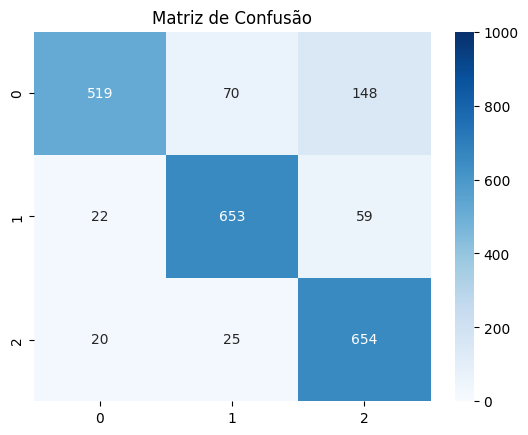

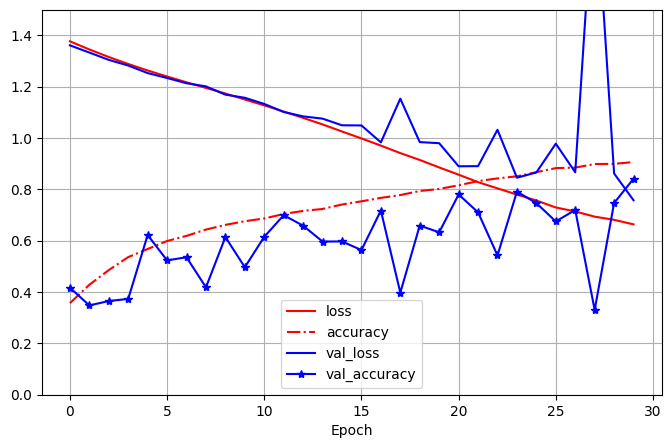

In [43]:
infos(model, history)

In [44]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(3) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                255720    
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 255863 (999.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
73/73 [==============================] - 1s 9ms/step - loss: 1.3989 - accuracy: 0.3609 - val_loss: 1.3919 - val_accuracy: 0.4046
Epoch 2/30
73/73 [==============================] - 0s 6ms/step - loss: 1.3867 - accuracy: 0.4010 - val_loss: 1.3802 - val_accuracy: 0.418

## BatchNormalization

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [45]:
model = create_model(4)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 25571)             102284    
 Normalization)                                                  
                                                                 
 dense_36 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_2 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                     

68/68 [==============================] - 0s 2ms/step
Accuracy: 89.31
macro = 0.8923661
micro = 0.89308757


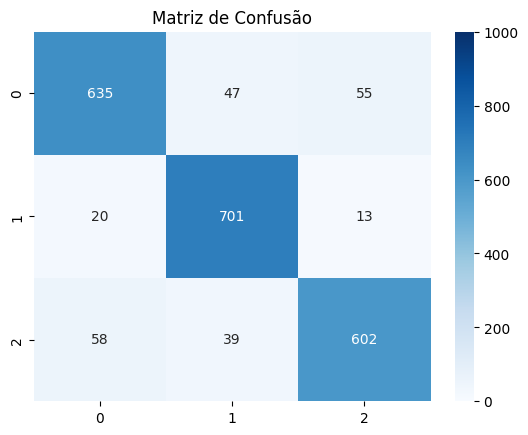

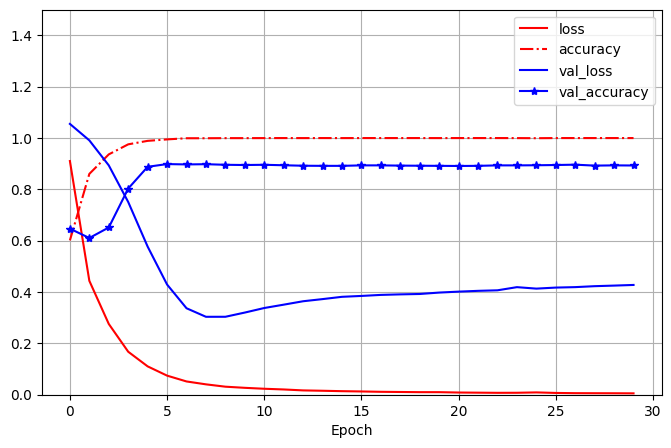

In [46]:
infos(model, history)

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(4) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 25571)             102284    
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_4 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_5 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                     

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
model = create_model(5)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25571)             0         
                                                                 
 dense_48 (Dense)            (None, 10)                255720    
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_50 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 25

68/68 [==============================] - 0s 2ms/step
Accuracy: 87.47
macro = 0.87478334
micro = 0.87465435


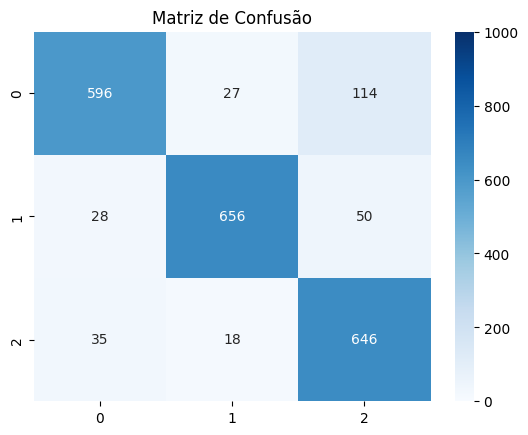

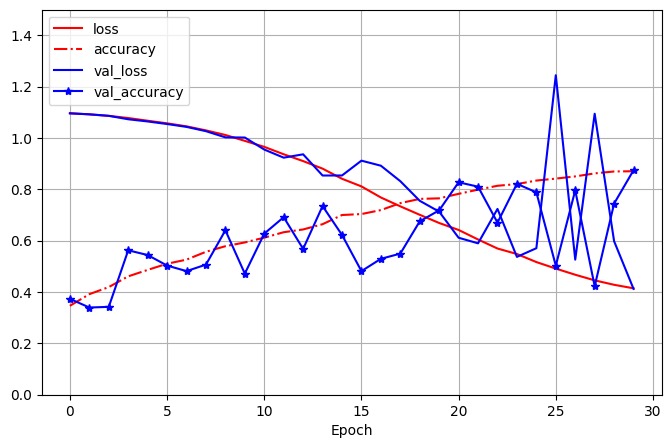

In [49]:
infos(model, history)

In [50]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(5) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 25571)             0         
                                                                 
 dense_51 (Dense)            (None, 10)                255720    
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_53 (Dense)            (None, 3)                 33        
                                                                 
Total params: 255863 (999.46 KB)
Trainable params: 25

## tudo

In [51]:
model = create_model(6)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 25571)             0         
                                                                 
 dense_60 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_13 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_61 (Dense)            (None, 10)              

68/68 [==============================] - 0s 3ms/step
Accuracy: 86.27
macro = 0.8618264
micro = 0.86267275


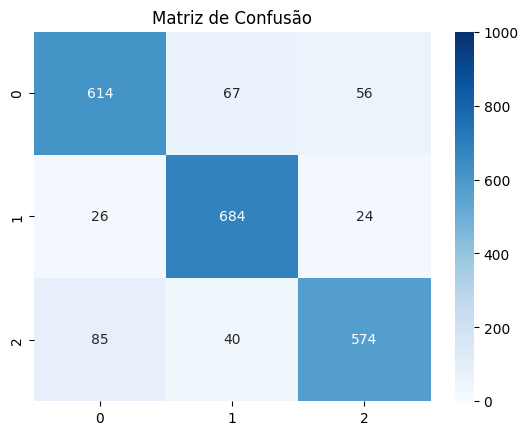

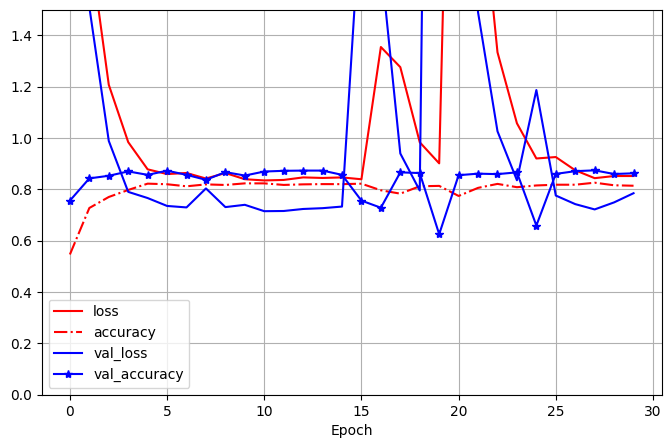

In [52]:
infos(model, history)

In [53]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(6) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 25571)             0         
                                                                 
 dense_63 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_16 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_64 (Dense)            (None, 10)              

## tudo com exp_schedule

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
model = create_model(6)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=exp_schedule)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_24 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 25571)             0         
                                                                 
 dense_72 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_25 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_73 (Dense)            (None, 10)              

68/68 [==============================] - 0s 4ms/step
Accuracy: 90.37
macro = 0.9030159
micro = 0.90368664


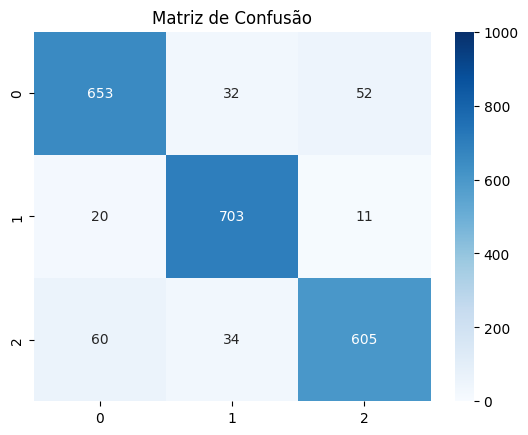

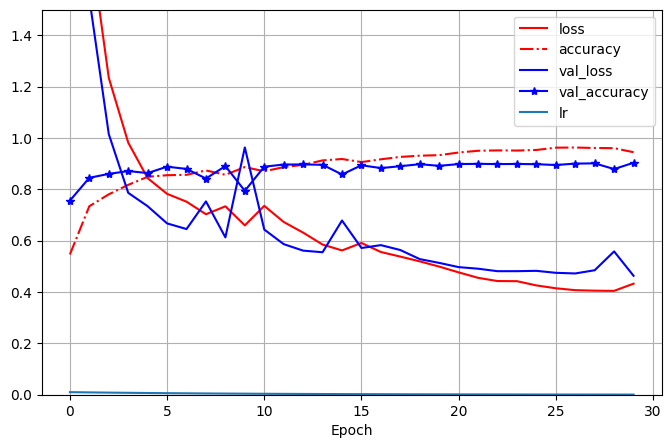

In [55]:
infos(model, history)

In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(6) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=exp_schedule)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_27 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 25571)             0         
                                                                 
 dense_75 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_28 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 10)                0         
                                                                 
 dense_76 (Dense)            (None, 10)              

## tudo com power_schedule

In [57]:
model = create_model(6)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=power_schedule, batch_size=100)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 25571)             0         
                                                                 
 dense_84 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_37 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_37 (Dropout)        (None, 10)                0         
                                                                 
 dense_85 (Dense)            (None, 10)              

68/68 [==============================] - 0s 3ms/step
Accuracy: 90.41
macro = 0.90364146
micro = 0.90414745


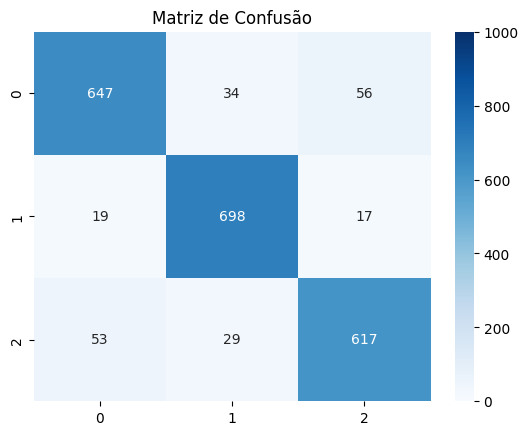

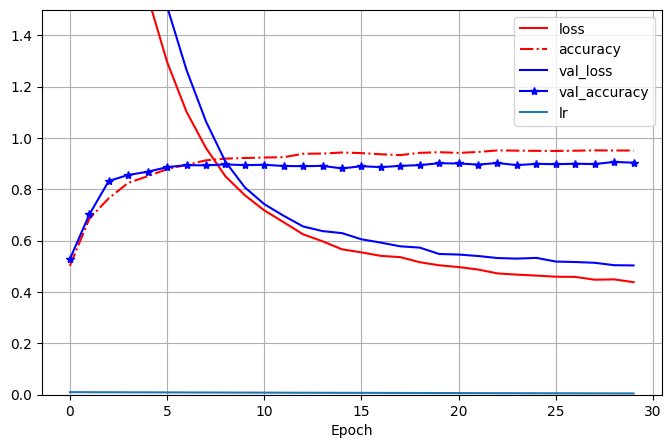

In [58]:
infos(model, history)

In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(finalFeature):
    
    X_train, X_test = finalFeature[train_index], finalFeature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model = create_model(6) 
    model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=power_schedule)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_39 (Ba  (None, 25571)             102284    
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 25571)             0         
                                                                 
 dense_87 (Dense)            (None, 10)                255720    
                                                                 
 batch_normalization_40 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 10)                0         
                                                                 
 dense_88 (Dense)            (None, 10)              